In [5]:
import numpy as np
import pandas as pd
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

app = Dash(__name__)


In [7]:
import dash
from dash import dcc, html
import pandas as pd

In [8]:
# VERSION CHECK
print(pd.__version__)
print(dash.__version__)


2.2.2
3.3.0


In [9]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
r = requests.get(url)

with open("spacex_launch_dash.csv", "wb") as f:
    f.write(r.content)


In [10]:
spacex_df = pd.read_csv("spacex_launch_dash.csv")
print(spacex_df.head())

   Unnamed: 0  Flight Number  Launch Site  class  Payload Mass (kg)  \
0           0              1  CCAFS LC-40      0                0.0   
1           1              2  CCAFS LC-40      0                0.0   
2           2              3  CCAFS LC-40      0              525.0   
3           3              4  CCAFS LC-40      0              500.0   
4           4              5  CCAFS LC-40      0              677.0   

  Booster Version Booster Version Category  
0  F9 v1.0  B0003                     v1.0  
1  F9 v1.0  B0004                     v1.0  
2  F9 v1.0  B0005                     v1.0  
3  F9 v1.0  B0006                     v1.0  
4  F9 v1.0  B0007                     v1.0  


In [11]:

# TASK 1: Add a Launch Site Drop-down Input Component
dcc.Dropdown(
    id='site-dropdown',
    options=[
        {'label': 'All Sites', 'value': 'ALL'},
        {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
        {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
        {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
        {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
    ],
    value='ALL',
    placeholder="Select a Launch Site here",
    searchable=True
)

Dropdown(options=[{'label': 'All Sites', 'value': 'ALL'}, {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'}, {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'}, {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'}, {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}], value='ALL', searchable=True, placeholder='Select a Launch Site here', id='site-dropdown')

In [12]:
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value')
)
def get_pie_chart(entered_site):
    if entered_site == 'ALL':
        fig = px.pie(
            spacex_df,
            values='class',
            names='class',
            title='Total Success Launches'
        )
        return fig
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        fig = px.pie(
            filtered_df,
            names='class',
            title=f'Total Success Launches for site {entered_site}'
        )
        return fig


In [13]:
min_payload = spacex_df['Payload Mass (kg)'].min()
max_payload = spacex_df['Payload Mass (kg)'].max()


In [14]:
# TASK 3: Add a Range Slider to Select Payload
dcc.RangeSlider(id='payload-slider',
                min=0, # Slider starting point in Kg [cite: 252]
                max=10000, # Slider ending point in Kg [cite: 253]
                step=1000, # Slider interval 
                marks={0: '0', 2500: '2500', 5000: '5000', 7500: '7500', 10000: '10000'},
                value=[min_payload, max_payload] # Default selected range [cite: 255]
                ),

(RangeSlider(min=0, max=10000, step=1000, marks={0: '0', 2500: '2500', 5000: '5000', 7500: '7500', 10000: '10000'}, value=[0.0, 9600.0], id='payload-slider'),)

In [15]:
# TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'), 
     Input(component_id="payload-slider", component_property="value")]
)
def get_scatter_chart(entered_site, payload_range):
    # Filter dataframe based on payload range slider values
    low, high = payload_range
    mask = (spacex_df['Payload Mass (kg)'] >= low) & (spacex_df['Payload Mass (kg)'] <= high)
    filtered_df = spacex_df[mask]
    
    if entered_site == 'ALL':
        # Render scatter plot for all sites
        fig = px.scatter(
            filtered_df, x='Payload Mass (kg)', y='class', 
            color="Booster Version Category",
            title='Correlation between Payload and Success for all Sites'
        )
        return fig
    else:
        # Filter for the specific site and render scatter plot
        site_filtered_df = filtered_df[filtered_df['Launch Site'] == entered_site]
        fig = px.scatter(
            site_filtered_df, x='Payload Mass (kg)', y='class', 
            color="Booster Version Category",
            title=f'Correlation between Payload and Success for site {entered_site}'
        )
        return fig

In [17]:
spacex_df.columns

Index(['Unnamed: 0', 'Flight Number', 'Launch Site', 'class',
       'Payload Mass (kg)', 'Booster Version', 'Booster Version Category'],
      dtype='object')

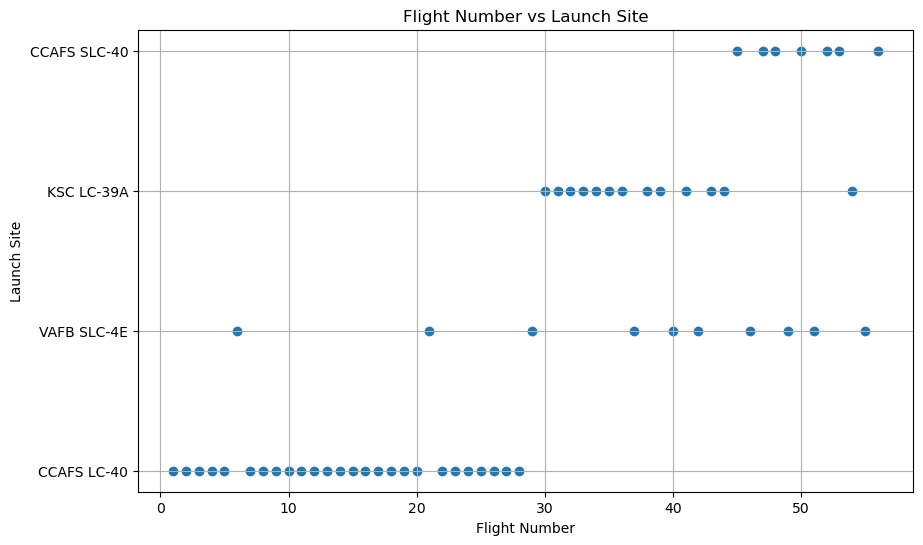

In [18]:
import matplotlib.pyplot as plt

# Assuming df is your SpaceX dataframe
plt.figure(figsize=(10, 6))
plt.scatter(spacex_df['Flight Number'], spacex_df['Launch Site'])

plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight Number vs Launch Site')

plt.grid(True)
plt.show()


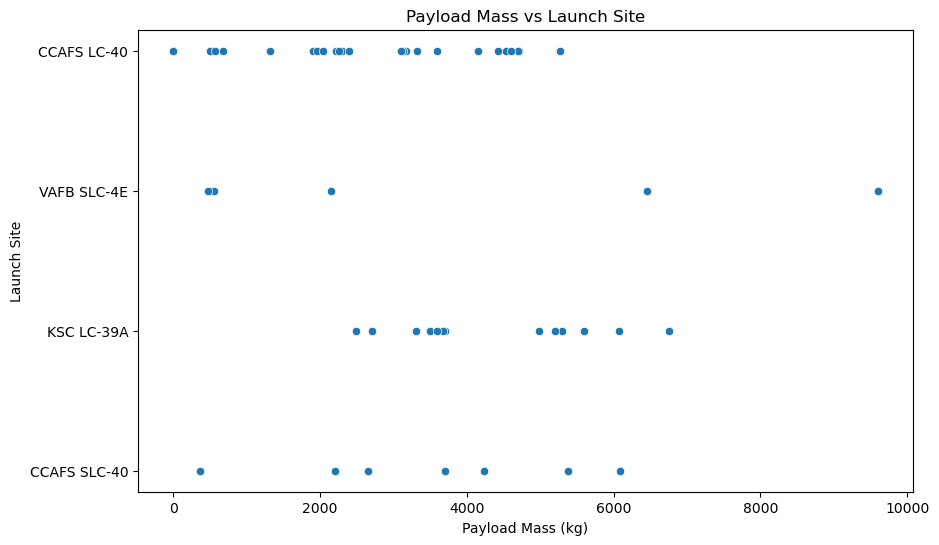

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Payload Mass (kg)',
    y='Launch Site',
    data=spacex_df
)

plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.title('Payload Mass vs Launch Site')
plt.show()


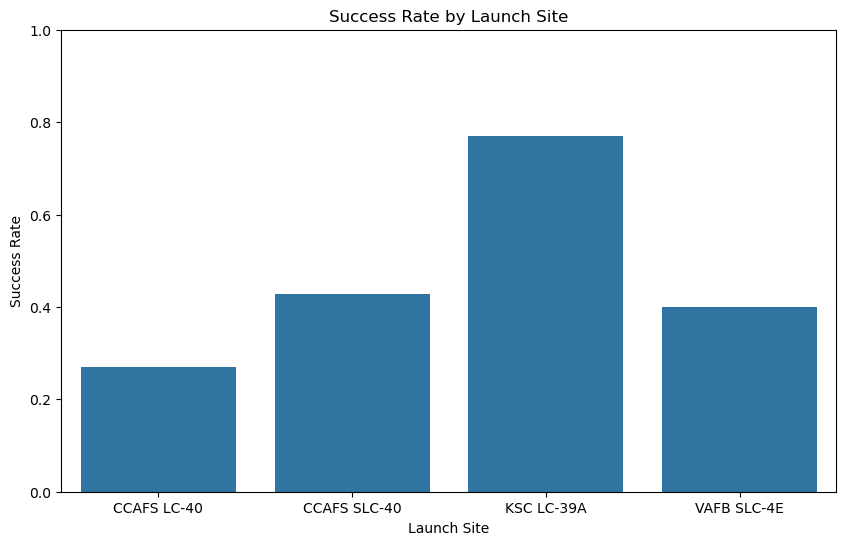

In [21]:
# Success rate by Launch Site
launch_success =spacex_df.groupby('Launch Site')['class'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x='Launch Site',
    y='class',
    data=launch_success
)

plt.xlabel('Launch Site')
plt.ylabel('Success Rate')
plt.title('Success Rate by Launch Site')
plt.ylim(0, 1)
plt.show()

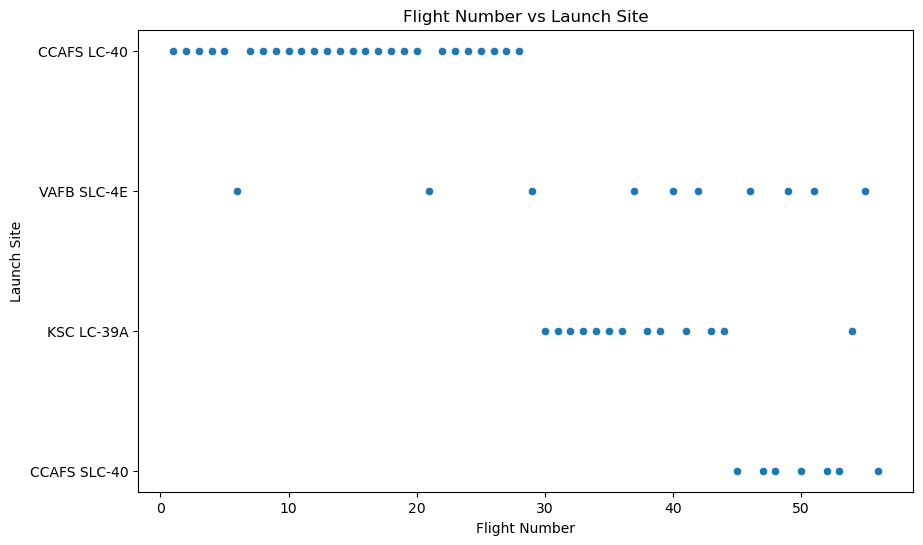

In [ ]:

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Flight Number',
    y='Launch Site',
    data=spacex_df
)

plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight Number vs Launch Site')
plt.show()


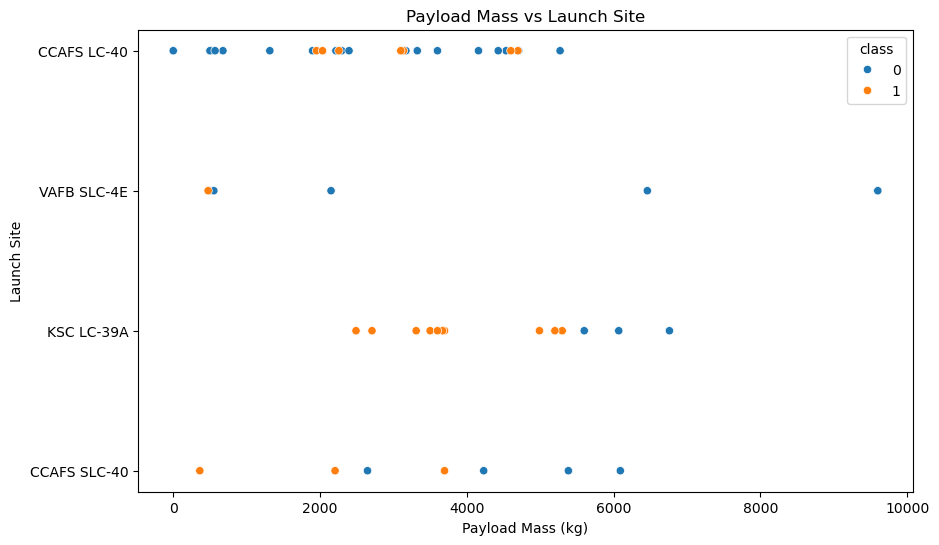

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Payload Mass (kg)',
    y='Launch Site',
    hue='class',
    data=spacex_df
)

plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.title('Payload Mass vs Launch Site')
plt.show()


In [ ]:
[col for col in spacex_df.columns if 'date' in col.lower()]
['Launch Date']

spacex_df['Year'] = pd.to_datetime(spacex_df['Launch Date']).dt.year

[]

In [ ]:
yearly_success = spacex_df.groupby('Year')['class'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(
    yearly_success['Year'],
    yearly_success['class'],
    marker='o'
)

plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.title('Yearly Average Success Rate')
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [30]:

# Find unique launch sites
unique_launch_sites = spacex_df['Launch Site'].unique()
print(unique_launch_sites)


['CCAFS LC-40' 'VAFB SLC-4E' 'KSC LC-39A' 'CCAFS SLC-40']


In [31]:

# Filter launch sites that begin with 'CCA' and get first 5 records
cca_launches = spacex_df[spacex_df['Launch Site'].str.startswith('CCA')].head(5)
print(cca_launches)


   Unnamed: 0  Flight Number  Launch Site  class  Payload Mass (kg)  \
0           0              1  CCAFS LC-40      0                0.0   
1           1              2  CCAFS LC-40      0                0.0   
2           2              3  CCAFS LC-40      0              525.0   
3           3              4  CCAFS LC-40      0              500.0   
4           4              5  CCAFS LC-40      0              677.0   

  Booster Version Booster Version Category  
0  F9 v1.0  B0003                     v1.0  
1  F9 v1.0  B0004                     v1.0  
2  F9 v1.0  B0005                     v1.0  
3  F9 v1.0  B0006                     v1.0  
4  F9 v1.0  B0007                     v1.0  


In [33]:
spacex_df.columns

Index(['Unnamed: 0', 'Flight Number', 'Launch Site', 'class',
       'Payload Mass (kg)', 'Booster Version', 'Booster Version Category'],
      dtype='object')

In [34]:
# List of boosters used by NASA (example)
nasa_boosters = ['Falcon 9', 'Falcon 9 Block 5']

# Filter dataset for NASA boosters and sum payload
total_payload_nasa = spacex_df[spacex_df['Booster Version'].isin(nasa_boosters)]['Payload Mass (kg)'].sum()
print(f"Total payload carried by NASA boosters: {total_payload_nasa} kg")

Total payload carried by NASA boosters: 0.0 kg


In [35]:
# Filter rows for booster version 'F9 v1.1' and calculate average payload
avg_payload = spacex_df[spacex_df['Booster Version'] == 'F9 v1.1']['Payload Mass (kg)'].mean()

print(f"Average payload mass for F9 v1.1: {avg_payload} kg")

Average payload mass for F9 v1.1: 2928.4 kg


In [37]:
# Count successful (1) and failed (0) missions
mission_counts = spacex_df['class'].value_counts()
print(mission_counts)

class
0    32
1    24
Name: count, dtype: int64


In [ ]:
# Find maximum payload mass
max_payload = spacex_df['Payload Mass (kg)'].max()

# Get booster(s) with this maximum payload
boosters_max_payload = spacex_df[spacex_df['Payload Mass (kg)']
                                  == max_payload]['Booster Version'].unique()

print(boosters_max_payload)

['F9 FT B1029.1' 'F9 FT B1036.1' 'F9 B4 B1041.1' 'F9 FT  B1036.2'
 'F9 B4  B1041.2']


In [44]:
import pandas as pd
import folium

# Dataset with 4 launch sites
data = {
    'Launch Site': ['CCAFS LC-40', 'CCAFS SLC-40', 'KSC LC-39A', 'VAFB SLC-4E'],
    'Latitude': [28.5623, 28.5632, 28.6084, 34.6328],
    'Longitude': [-80.5774, -80.5768, -80.6043, -120.6108]
}

df = pd.DataFrame(data)

# Create a global map
launch_map = folium.Map(location=[30, -90], zoom_start=3)

# Add markers for each launch site
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Launch Site'],
        icon=folium.Icon(color='red')
    ).add_to(launch_map)

# Save map
launch_map.save("spacex_launch_sites_map.html")


In [45]:
import pandas as pd
import folium

# Sample dataset with 4 launch sites and launch outcomes
data = {
    'Launch Site': ['CCAFS LC-40', 'CCAFS SLC-40', 'KSC LC-39A', 'VAFB SLC-4E'],
    'Latitude': [28.5623, 28.5632, 28.6084, 34.6328],
    'Longitude': [-80.5774, -80.5768, -80.6043, -120.6108],
    'class': [1, 0, 1, 0]  # 1=success, 0=failure
}

df = pd.DataFrame(data)

# Create map
launch_map = folium.Map(location=[30, -90], zoom_start=3)

# Add color-coded markers
for index, row in df.iterrows():
    if row['class'] == 1:
        color = 'green'   # Successful launch
    else:
        color = 'red'     # Failed launch
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Launch Site']} | {'Success' if row['class']==1 else 'Failure'}",
        icon=folium.Icon(color=color)
    ).add_to(launch_map)

# Save map
launch_map.save("spacex_launch_outcomes_map.html")


In [49]:
import pandas as pd
import folium
import math

# Haversine function to calculate distance in km
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(delta_lambda/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Example: selected launch site (CCAFS LC-40)
launch_site = {'name': 'CCAFS LC-40', 'lat': 28.5623, 'lon': -80.5774}

# Nearby features (example coordinates)
features = {
    'Railway': (28.5650, -80.5800),
    'Highway': (28.5600, -80.5750),
    'Coastline': (28.5625, -80.5785)
}

# Create map centered on launch site
site_map = folium.Map(location=[launch_site['lat'], launch_site['lon']], zoom_start=15)

# Add launch site marker
folium.Marker(
    location=[launch_site['lat'], launch_site['lon']],
    popup=launch_site['name'],
    icon=folium.Icon(color='blue')
).add_to(site_map)

# Add nearby features with distance
for name, coords in features.items():
    distance_km = haversine(launch_site['lat'], launch_site['lon'], coords[0], coords[1])
    folium.Marker(
        location=coords,
        popup=f"{name} | {distance_km:.2f} km away",
        icon=folium.Icon(color='green' if name != 'Coastline' else 'orange')
    ).add_to(site_map)
    
    # Draw line to feature
    folium.PolyLine([(launch_site['lat'], launch_site['lon']), coords], color='gray', dash_array='5').add_to(site_map)

# Save map
site_map.save("launch_site_proximities_map.html")


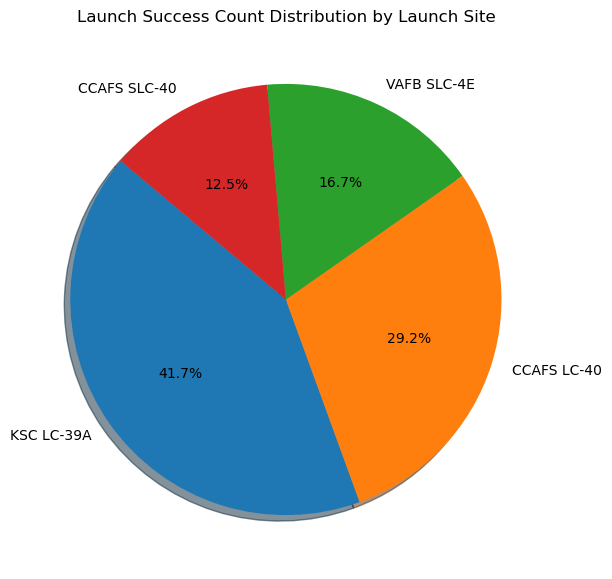

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("spacex_launch_dash.csv")

# Filter only successful launches
success_df = df[df['class'] == 1]

# Count successful launches per site
success_counts = success_df['Launch Site'].value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
success_counts.plot.pie(autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Launch Success Count Distribution by Launch Site")
plt.ylabel("")  # remove y-axis label
plt.show()


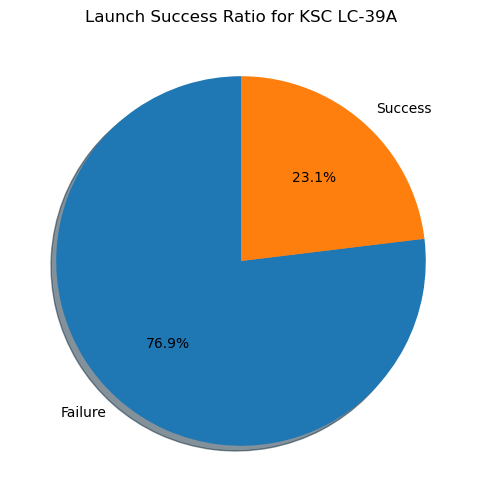

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("spacex_launch_dash.csv")

# Calculate success ratio per site
success_ratio = df.groupby('Launch Site')['class'].mean()

# Get site with highest success ratio
top_site = success_ratio.idxmax()
top_site_data = df[df['Launch Site'] == top_site]['class'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
top_site_data.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, labels=['Failure', 'Success'])
plt.title(f"Launch Success Ratio for {top_site}")
plt.ylabel("")
plt.show()


In [52]:
import plotly.express as px

# Load dataset
df = pd.read_csv("spacex_launch_dash.csv")

# Example: filter payload between 4000 and 6000 kg
filtered_df = df[(df['Payload Mass (kg)'] >= 4000) & (df['Payload Mass (kg)'] <= 6000)]

# Scatter plot
fig = px.scatter(
    filtered_df,
    x='Payload Mass (kg)',
    y='class',
    color='Booster Version Category',
    title='Payload vs Launch Outcome',
    labels={'class': 'Launch Outcome (0=Failure,1=Success)'}
)
fig.show()


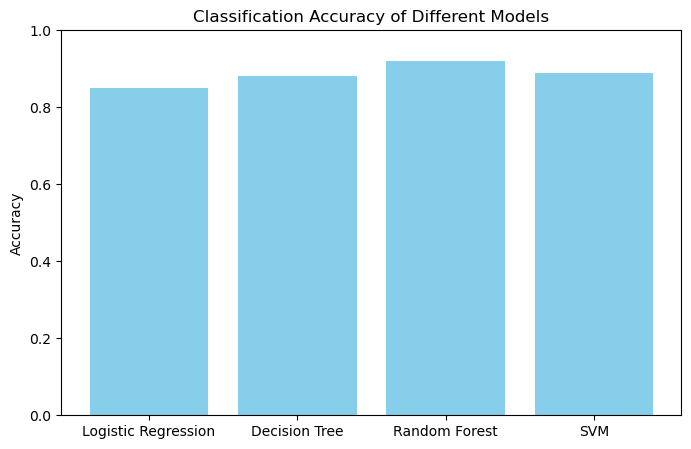

Best performing model: Random Forest with accuracy 92.00%


In [53]:
import matplotlib.pyplot as plt

# Example accuracy scores
accuracy_scores = {
    'Logistic Regression': 0.85,
    'Decision Tree': 0.88,
    'Random Forest': 0.92,
    'SVM': 0.89
}

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Classification Accuracy of Different Models')
plt.show()

# Find model with highest accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)
print(f"Best performing model: {best_model} with accuracy {accuracy_scores[best_model]*100:.2f}%")
